# Genesis4 Basic Example

This will show the basic usage of LUME-Genesis.

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from genesis.version4.genesis4 import Genesis4Python as Genesis4  # TODO import
from genesis.version4.input import Track, Write

%config InlineBackend.figure_format = 'retina'

## Setup

Instantiate the object on a value init file. This will configure a working directory that stages all input and output files.

In [2]:
G = Genesis4("data/basic4/cu_hxr.in", "data/basic4/hxr.lat", verbose=True)

Input is simply a list of dicts corresponding to the namelist

Change something

In [3]:
G.input.main.by_namelist[Track]

[Track(zstop=10.0)]

In [4]:
for track in G.input.main.by_namelist[Track]:
    track.zstop = 92

In [5]:
G.input.main.by_namelist[Track]

[Track(zstop=92)]

In [6]:
print(G.input.main.by_namelist[Track][0])

&track
  zstop = 92
&end


In [7]:
# Add writing a field file
G.input.main.namelists.append(Write(field="end"))

# Add writing a beam (particle) file
G.input.main.namelists.append(Write(beam="end"))

In [8]:
for write in G.input.main.by_namelist[Write]:
    print(write)

&write
  field = end
&end
&write
  beam = end
&end


## Run
Run with MPI. Here, setting `G.nproc = 0` will automatically select the maximum number of CPUs.

In [9]:
G.nproc = 0
G.run()

Configured to run in: /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpzuk1_8_i
Setting use_mpi = True because nproc = 0
Running Genesis4 in /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpzuk1_8_i
/Users/klauer/miniforge3/envs/lume-genesis/bin/mpirun -n 0 /Users/klauer/miniforge3/envs/lume-genesis/bin/genesis4 -l /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpzuk1_8_i/genesis.lat /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpzuk1_8_i/input.in


Genesis4Output(alias={'LSCfield': 'Beam/LSCfield', 'alphax': 'Beam/alphax', 'alphay': 'Beam/alphay', 'betax': 'Beam/betax', 'betay': 'Beam/betay', 'bunching': 'Beam/bunching', 'bunchingphase': 'Beam/bunchingphase', 'current': 'Beam/current', 'efield': 'Beam/efield', 'emax': 'Beam/emax', 'emin': 'Beam/emin', 'emitx': 'Beam/emitx', 'emity': 'Beam/emity', 'energy': 'Beam/energy', 'energyspread': 'Beam/energyspread', 'pxmax': 'Beam/pxmax', 'pxmin': 'Beam/pxmin', 'pxposition': 'Beam/pxposition', 'pymax': 'Beam/pymax', 'pymin': 'Beam/pymin', 'pyposition': 'Beam/pyposition', 'wakefield': 'Beam/wakefield', 'xmax': 'Beam/xmax', 'xmin': 'Beam/xmin', 'ymax': 'Beam/ymax', 'ymin': 'Beam/ymin', 'dgrid': 'Field/dgrid', 'intensity-farfield': 'Field/intensity-farfield', 'intensity-nearfield': 'Field/intensity-nearfield', 'ngrid': 'Field/ngrid', 'phase-farfield': 'Field/phase-farfield', 'phase-nearfield': 'Field/phase-nearfield', 'power': 'Field/power', 'xdivergence': 'Field/xdivergence', 'xpointing': '

In [10]:
if G.output.run.error:
    print(G.output.run.error_reason)
else:
    print("No error")

No error


## Output

The main output is an HDF5. The Genesis4 object loads this data into a flat dict

In [11]:
list(G.output)

['Beam/LSCfield',
 'Beam/alphax',
 'Beam/alphay',
 'Beam/betax',
 'Beam/betay',
 'Beam/bunching',
 'Beam/bunchingphase',
 'Beam/current',
 'Beam/efield',
 'Beam/emax',
 'Beam/emin',
 'Beam/emitx',
 'Beam/emity',
 'Beam/energy',
 'Beam/energyspread',
 'Beam/pxmax',
 'Beam/pxmin',
 'Beam/pxposition',
 'Beam/pymax',
 'Beam/pymin',
 'Beam/pyposition',
 'Beam/wakefield',
 'Beam/xmax',
 'Beam/xmin',
 'Beam/xposition',
 'Beam/xsize',
 'Beam/ymax',
 'Beam/ymin',
 'Beam/yposition',
 'Beam/ysize',
 'Field/dgrid',
 'Field/intensity-farfield',
 'Field/intensity-nearfield',
 'Field/ngrid',
 'Field/phase-farfield',
 'Field/phase-nearfield',
 'Field/power',
 'Field/xdivergence',
 'Field/xpointing',
 'Field/xposition',
 'Field/xsize',
 'Field/ydivergence',
 'Field/ypointing',
 'Field/yposition',
 'Field/ysize',
 'Global/frequency',
 'Global/gamma0',
 'Global/lambdaref',
 'Global/one4one',
 'Global/s',
 'Global/sample',
 'Global/scan',
 'Global/slen',
 'Global/time',
 'Lattice/aw',
 'Lattice/ax',
 'Lat

This is the output file that was loaded

In [12]:
print("Took", G.output.run.run_time, "sec")

Took 118.34913041698746 sec


In [13]:
print(list(G.output.keys())[:10], "...")
print(G.output.alias["alphax"])

['Beam/LSCfield', 'Beam/alphax', 'Beam/alphay', 'Beam/betax', 'Beam/betay', 'Beam/bunching', 'Beam/bunchingphase', 'Beam/current', 'Beam/efield', 'Beam/emax'] ...
Beam/alphax


There are many outputs. `.output_info()` gives a convenient table describing what was read in.

In [14]:
G.output.info()

Output data

key                       value              unit
--------------------------------------------------
Beam/LSCfield             array: (2544, 552)  eV/m
Beam/alphax               array: (1, 552)    rad
Beam/alphay               array: (1, 552)    rad
Beam/betax                array: (1, 552)    m
Beam/betay                array: (1, 552)    m
Beam/bunching             array: (2544, 552)  
Beam/bunchingphase        array: (2544, 552)  rad
Beam/current              array: (2544, 552)  A
Beam/efield               array: (2544, 552)  eV/m
Beam/emax                 array: (2544, 552)  m_ec^2
Beam/emin                 array: (2544, 552)  m_ec^2
Beam/emitx                array: (1, 552)    m
Beam/emity                array: (1, 552)    m
Beam/energy               array: (2544, 552)  m_ec^2
Beam/energyspread         array: (2544, 552)  m_ec^2
Beam/pxmax                array: (2544, 552)  rad
Beam/pxmin                array: (2544, 552)  rad
Beam/pxposition           array: (2544, 5

## Fields

Field files can be very large and are made readily available for lazy loading.
Loaded fields are present in the key `"field"` in the output:

In [15]:
list(G.output["field"])

[]

For convenience, fields and particles may be automatically loaded after a run by using `run(load_fields=True, load_particles=True)` instead.
Otherwise, these can be manually loaded individually or all at once:

In [16]:
G.output.load_fields()

['end']

In [17]:
list(G.output["field"])

['end']

This field data has two parts: basic parameters `param`, and the raw 3D complex array `dfl`:

In [18]:
G.output["field"]["end"]["param"]

{'gridpoints': 101,
 'gridsize': 2e-06,
 'refposition': 0.0,
 'wavelength': 1.3789244869952112e-10,
 'slicecount': 552,
 'slicespacing': 2.7578489739904225e-08}

In [19]:
G.output["field"]["end"]["dfl"].shape

(101, 101, 552)

`.field` is a convenience property that points to this

In [20]:
G.output.field["end"]["param"]

{'gridpoints': 101,
 'gridsize': 2e-06,
 'refposition': 0.0,
 'wavelength': 1.3789244869952112e-10,
 'slicecount': 552,
 'slicespacing': 2.7578489739904225e-08}

## Visualize Field

In [22]:
# Sum over y and compute the absolute square
dfl = G.output.field["end"]["dfl"]
param = G.output.field["end"]["param"]
dat2 = np.abs(np.sum(dfl, axis=1)) ** 2

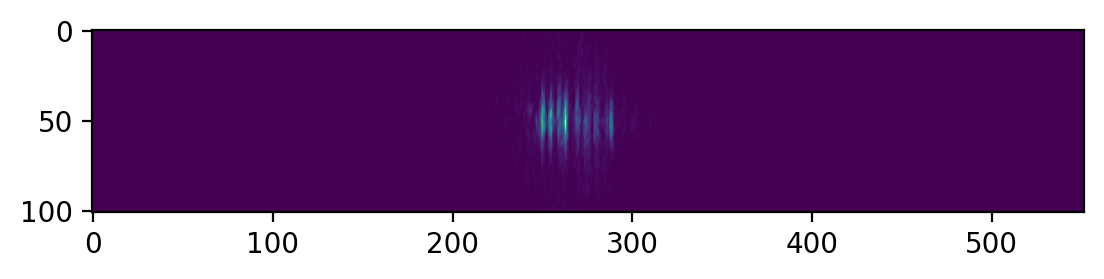

In [23]:
plt.imshow(dat2)

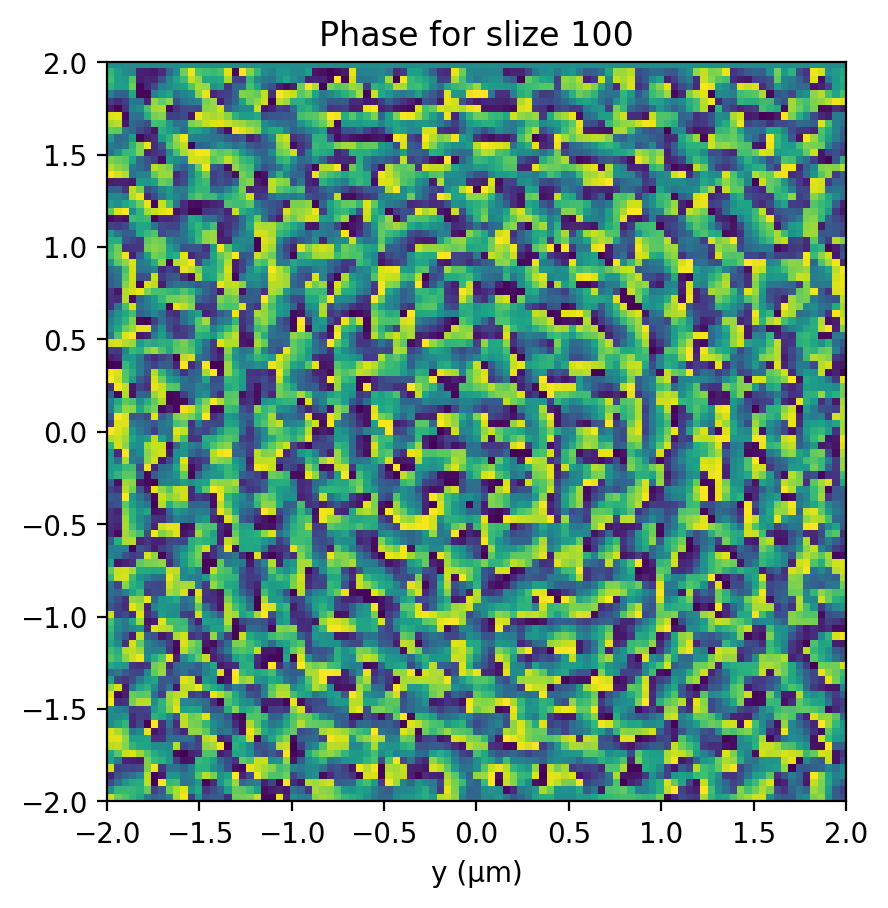

In [24]:
def plot_slice(i=0):
    dat = np.angle(dfl[:, :, i])

    dx = param["gridsize"] * 1e6
    plt.xlabel("x (µm)")
    plt.xlabel("y (µm)")
    plt.title(f"Phase for slize {i}")
    plt.imshow(dat.T, origin="lower", extent=[-dx, dx, -dx, dx])


plot_slice(i=100)

# Particles

Particle files can be read in as [openPMD-beamphysics](https://christophermayes.github.io/openPMD-beamphysics/) `ParticleGroup` objects.
These are lazily loaded by default (`run(load_particles=False)`). They may also be loaded all at once, with `load_particles()`. `output.particle_files` will only show not-yet-loaded particle files.

In [25]:
G.output.particle_files

{'end': <genesis.version4.output.LazyLoadHDF5 at 0x117af46e0>}

In [26]:
G.output.load_particles()

['end']

In [27]:
G.output["particles"]

{'end': <ParticleGroup with 565248 particles at 0x16c2c9e80>}

In [28]:
P = G.output["particles"]["end"]

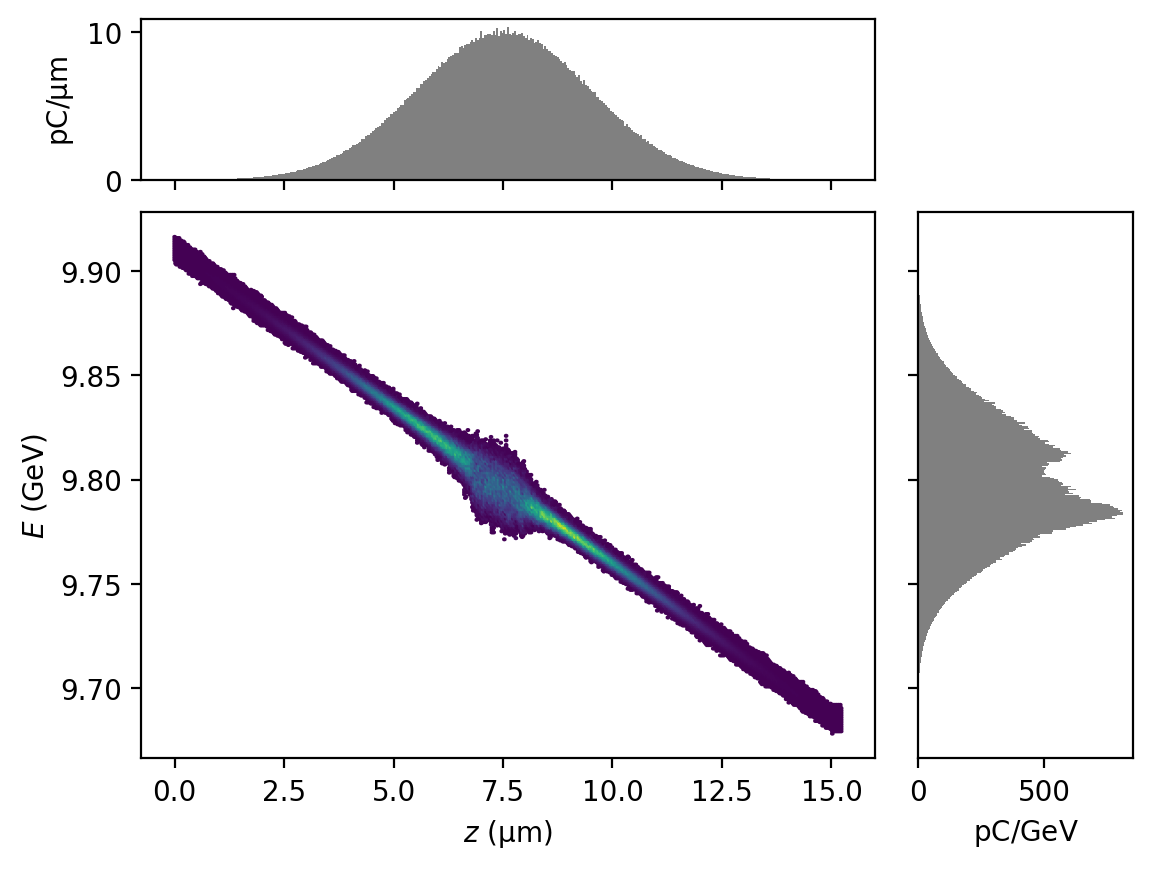

In [29]:
P.plot("z", "energy")

Change to z coordinates to see the current. Note that the head of the bunch is now on the left.

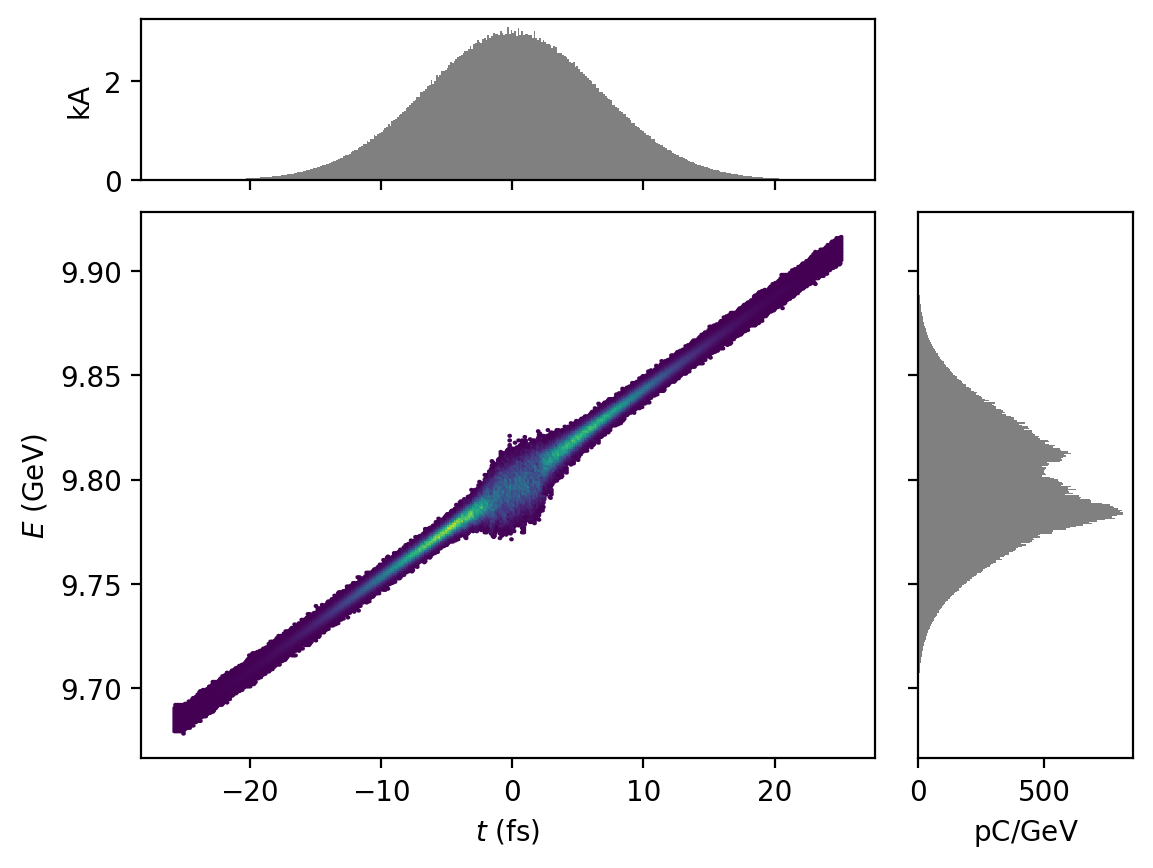

In [30]:
P.drift_to_z()
P.plot("t", "energy")

Check some statistics

In [31]:
P["norm_emit_x"], P["norm_emit_y"], P["mean_gamma"]

(4.0001096222783936e-07, 4.0003515548155006e-07, 19172.14812812367)

## Bunching

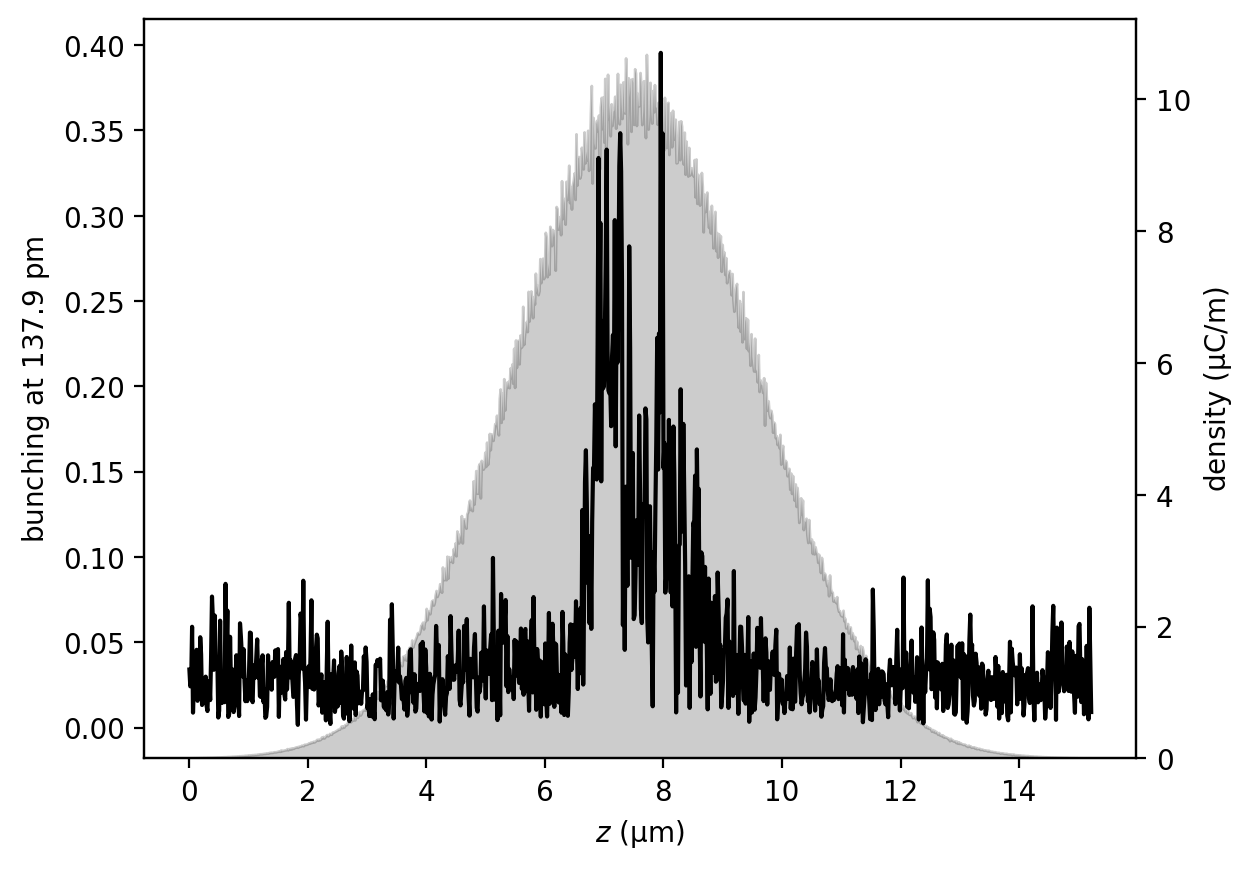

In [32]:
wavelength = G.input.main.get_setup().lambda0
bunching_key = f"bunching_{wavelength}"
P.drift_to_t()

P.slice_plot(bunching_key, n_slice=1000)

In [33]:
# Genesis4 data
final_bunching = G.output.beam["bunching"][-1, :]
current = G.output.beam["current"][-1, :]
s = G.output.global_["s"]


# ParticleGroup data
ss = P.slice_statistics(bunching_key, n_slice=len(s))
ss.keys()
x = ss["mean_z"]
y = ss[bunching_key]

Compare 

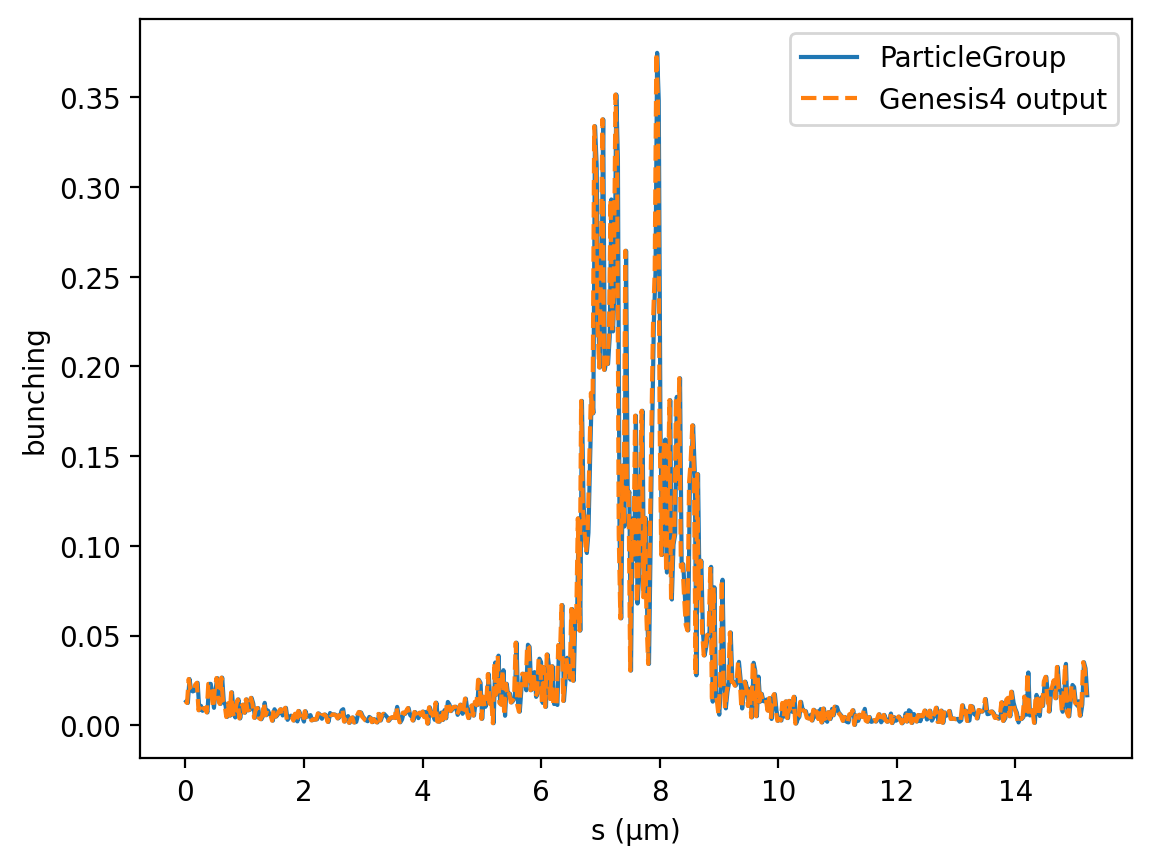

In [34]:
fig, ax = plt.subplots()
ax.plot(x * 1e6, y, label="ParticleGroup")
ax.plot(s * 1e6, final_bunching, "--", label="Genesis4 output")
ax.set_xlabel("s (µm)")
ax.set_ylabel("bunching")
plt.legend()

This is the average bunching from the ParticleGroup:

In [35]:
P.bunching(wavelength)

(-0.007790079397537834+0.0011914771386017963j)

That agrees with the appropriate averaging of Genesis4's bunching calc:

In [36]:
G.stat("bunching")[-1]

0.007880669691905443

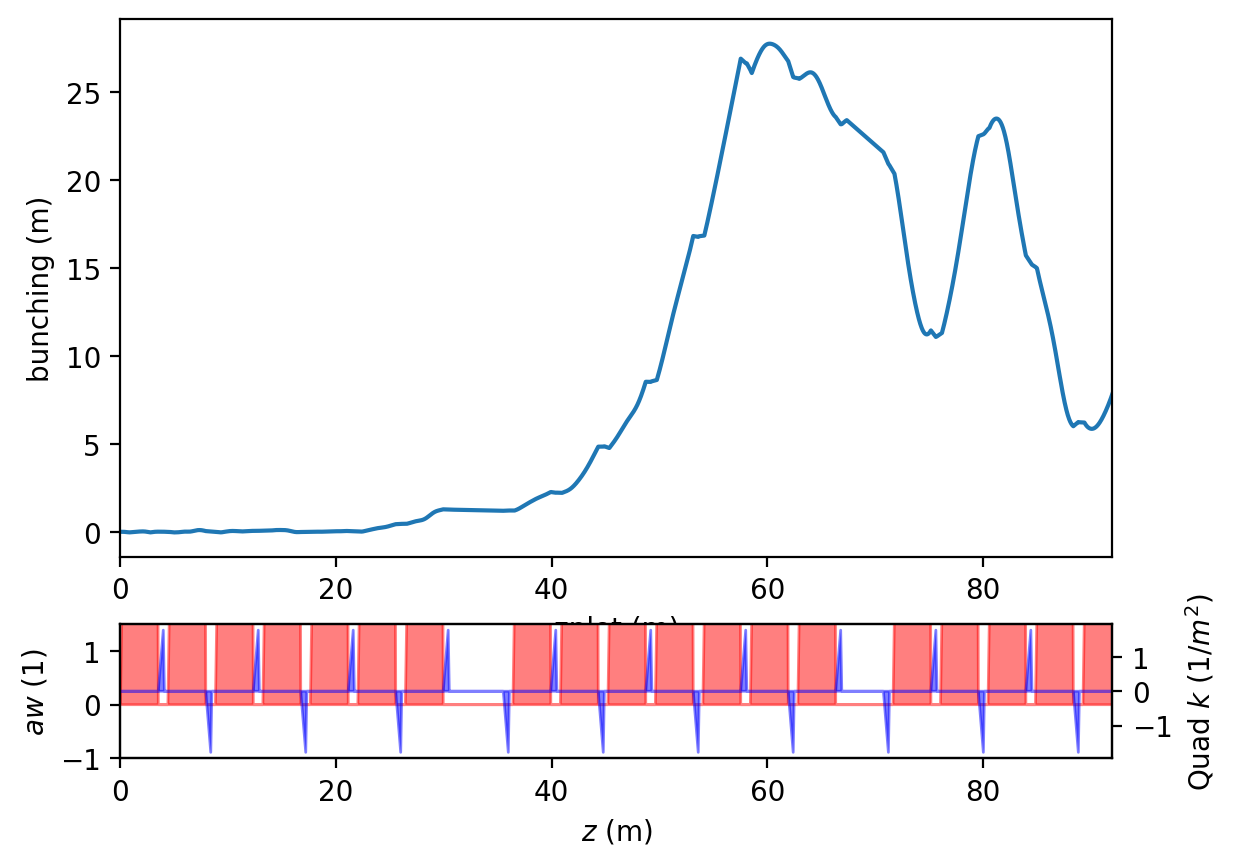

In [37]:
G.plot("bunching")

Check the total charge in pC:

In [38]:
P["charge"] / 1e-12  # pC

50.16037387875738

## Units

Each item in the output dict has a corresponding units

In [39]:
G.output.units("Beam/betax")

pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0))

# Plotting

Convenient plotting of the data in `.output` is provided by `.plot`. The default is to plot the power. Depending on the key these statistics are averaged or integrated over the slices. Some keys like `power` are converted to `peak_power`, while `field_energy` is the integral over `field_power`. 

In [40]:
print(G.output.alias["power"])

Field/power


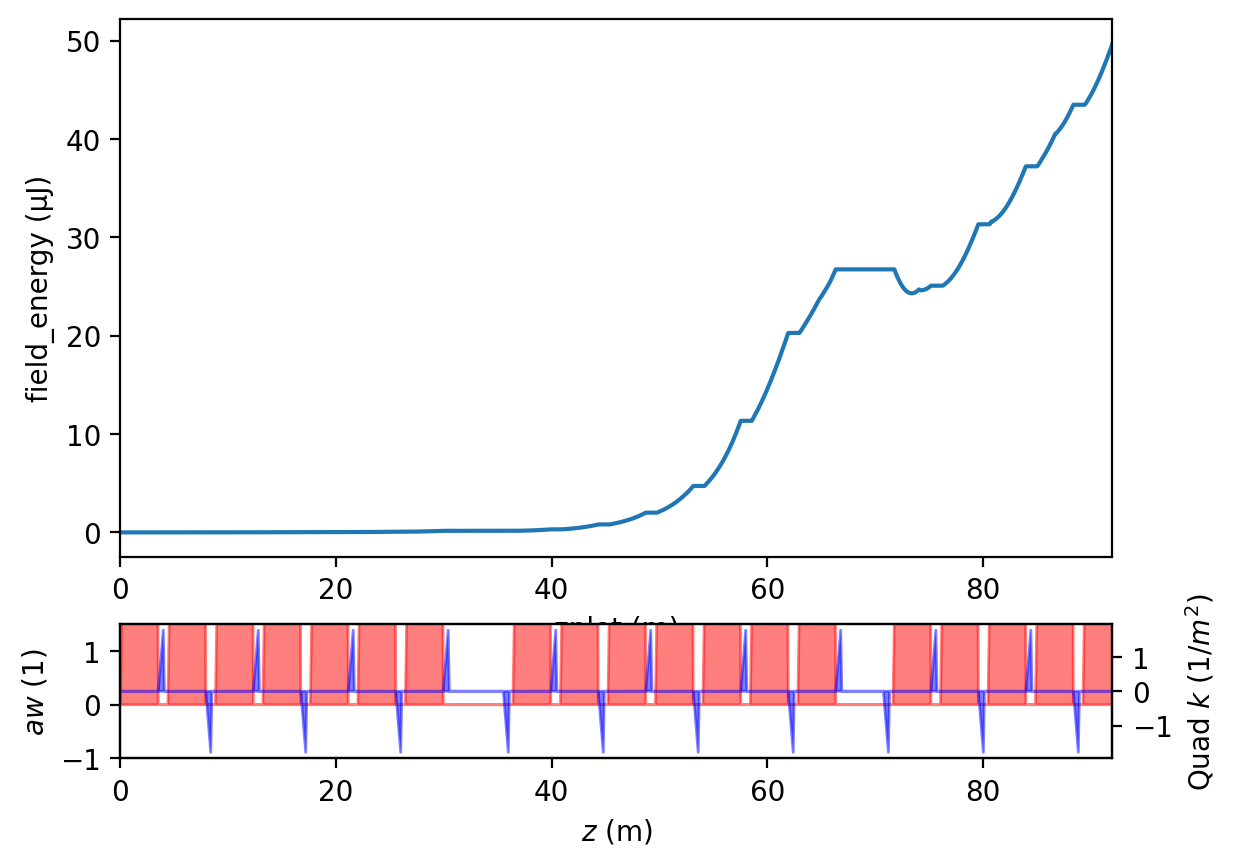

In [41]:
G.plot()

Left and right axes can be set this way:

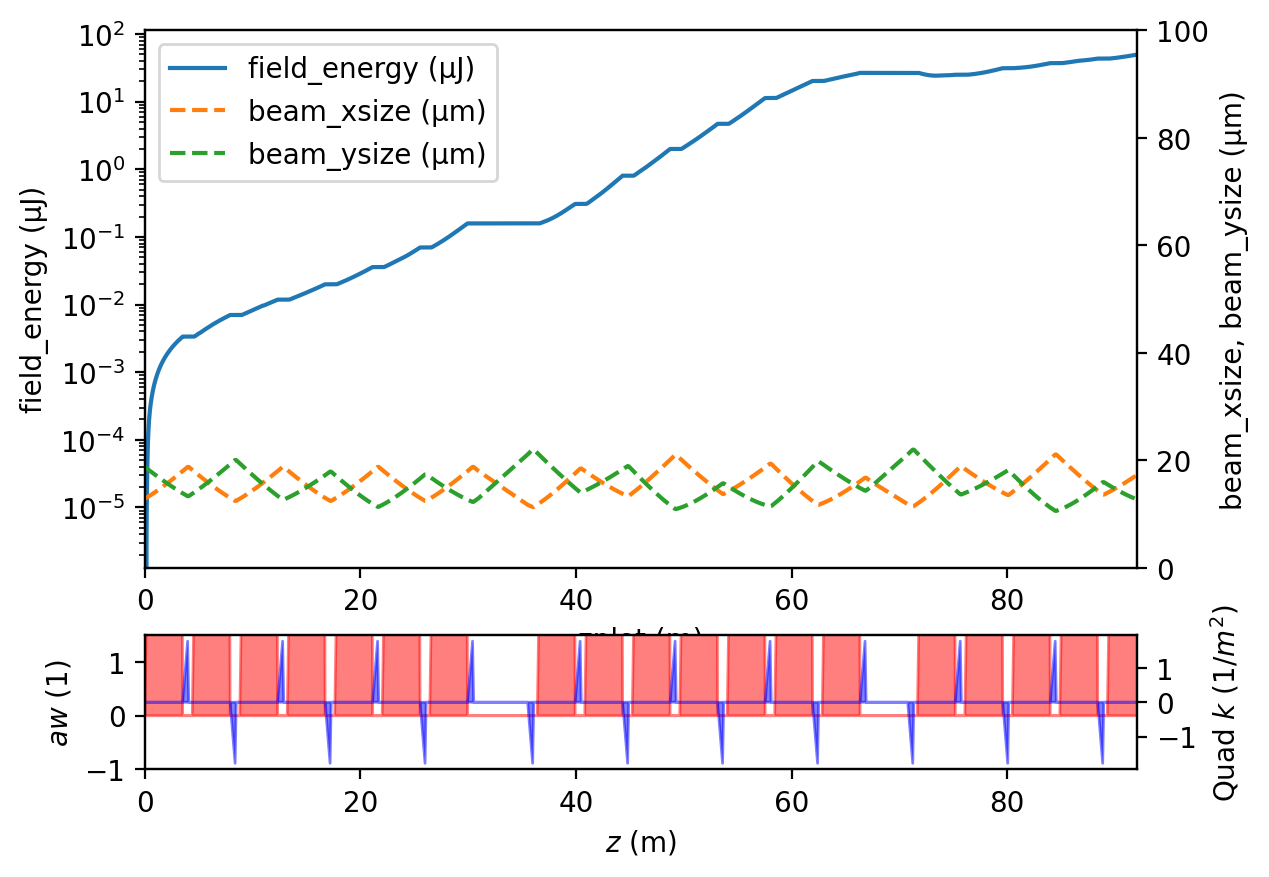

In [42]:
G.plot("field_energy", yscale="log", y2=["beam_xsize", "beam_ysize"], ylim2=(0, 100e-6))

By default, these plots average over slices. In the case of beam sizes, simply averaging these does not take into account the effect of misaligned slices. To plot this, LUME-Genesis provides additional `beam_sigma_x`, `beam_sima_y`, `beam_sigma_energy` keys that properly project these quantities. The difference is noticable in the energy spread calculation:

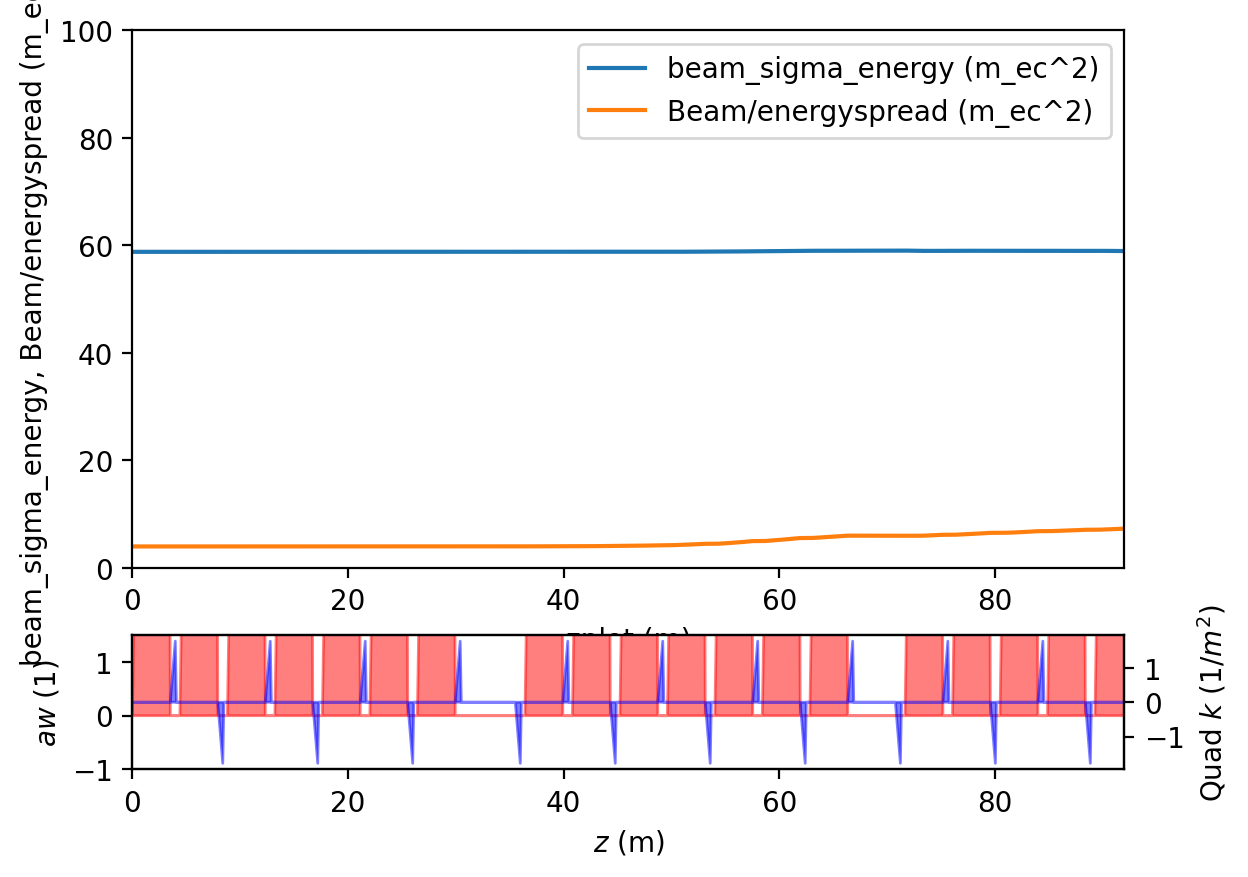

In [43]:
G.plot(["beam_sigma_energy", "Beam/energyspread"], ylim=(0, 100))

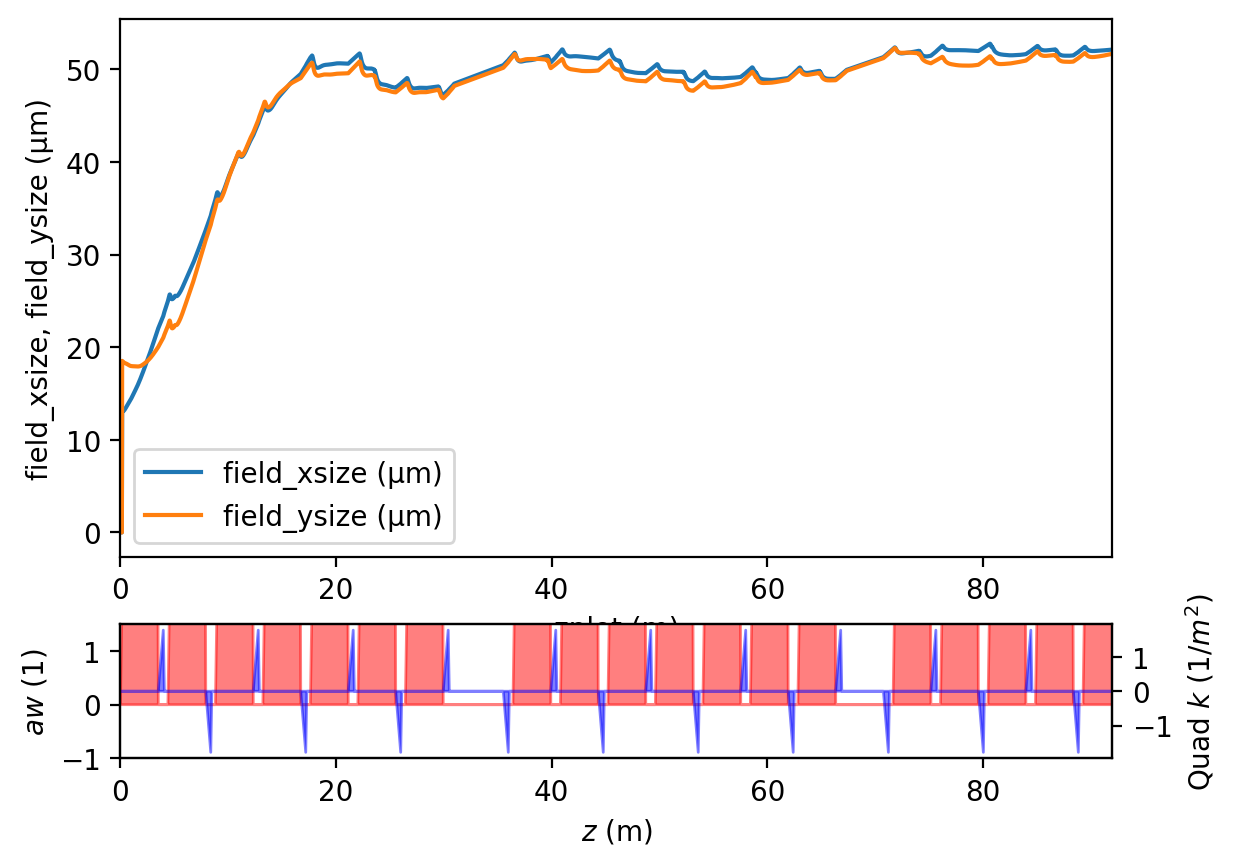

In [44]:
G.plot(["field_xsize", "field_ysize"])

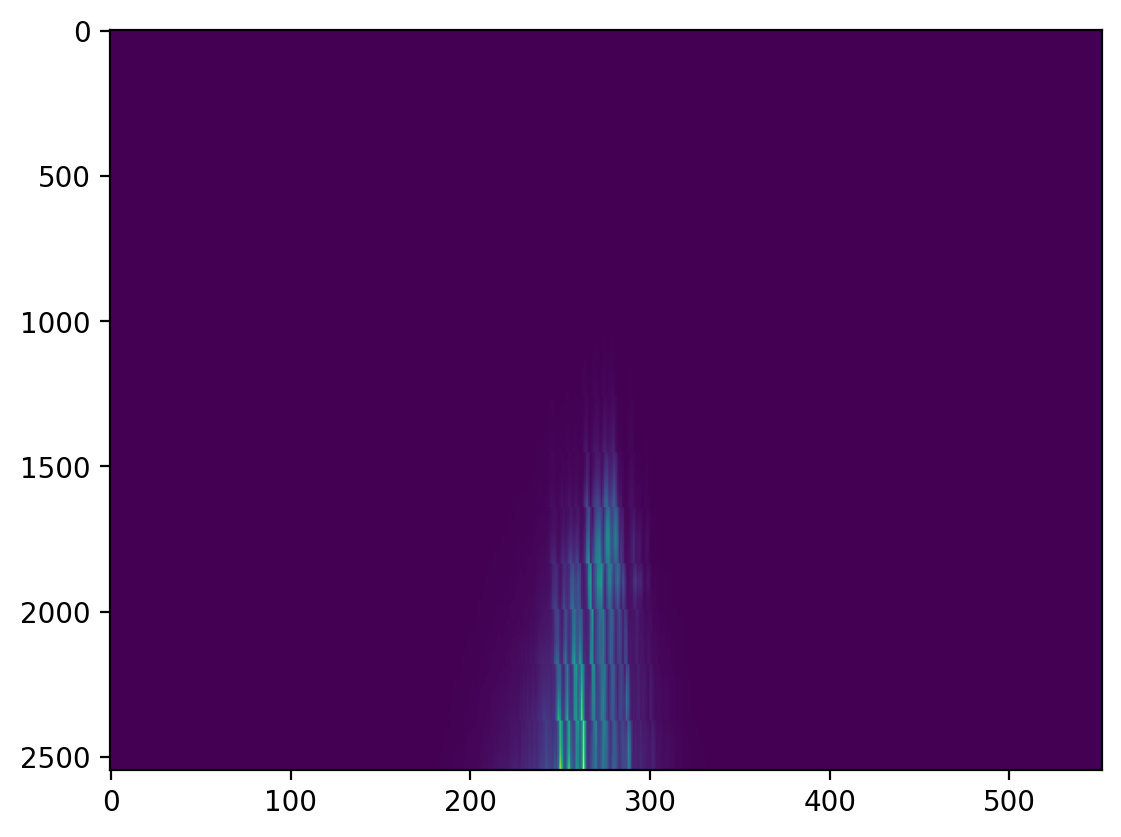

In [45]:
plt.imshow(G.output.field_info["power"], aspect="auto")

## Archiving

In [46]:
afile = G.archive()

NotImplementedError: 

In [ ]:
# This is not yet implemented
try:
    G.from_archive(afile)
except NotImplementedError:
    print("from_archive is not implemented")

In [ ]:
G.load_output()

# Manual loading of Genesis4 data

Sometimes it is necessary to run Genesis4 manually, and load the output into LUME-Genesis for further analysis.

First, let's create some input to run in a local directory `temp/`:

In [ ]:
import os

os.makedirs("temp/", exist_ok=True)
G.write_input("temp/")

Now run on the command line:

In [ ]:
!cd temp;./run >log.txt

Using the `use_temp_dir=False` and `workdir` options, the input and output data can be loaded into a new Genesis4 object:

In [ ]:
G2 = Genesis4("temp/genesis4.in", use_temp_dir=False, workdir="temp/", verbose=True)
G2.load_output()

In [ ]:
G2.plot()

# Cleanup

In [ ]:
import shutil

shutil.rmtree("temp")
os.remove(afile)

# Future work

In [ ]:
from dataclasses import dataclass


@dataclass
class Setup:
    rootname: str = None
    lattice: str = None
    beamline: str = None
    gamma0: float = 11350.3
    lambda0: float = 1e-10
    delz: float = 0.015
    seed: int = 123456789
    npart: int = 8192
    nbins: int = 4
    one4one: bool = False
    shotnoise: bool = True
    beam_global_stat: bool = False
    field_global_stat: bool = False
    exclude_spatial_output: bool = False
    exclude_fft_output: bool = False
    exclude_intensity_output: bool = False
    exclude_energy_output: bool = False
    exclude_aux_output: bool = False
    exclude_current_output: bool = True

In [ ]:
dat = {
    "type": "setup",
    "rootname": "LCLS2_HXR_9keV",
    "lattice": "data/basic4/hxr.lat",
    "beamline": "HXR",
    "lambda0": 1.3789244869952112e-10,
    "gamma0": 19174.0776,
    "delz": 0.026,
    "seed": 84672,
    "npart": 1024,
}

lookup = {"setup": Setup}


def make(dat):
    type = dat.pop("type")
    return lookup[type](**dat)


s = make(dat)
s

In [ ]:
s0 = Setup()

In [ ]:
# These are the keys that are different from default:
from dataclasses import asdict

d2 = asdict(s0)
for k in list(d2):
    if getattr(s, k) == d2[k]:
        d2.pop(k)
list(d2)